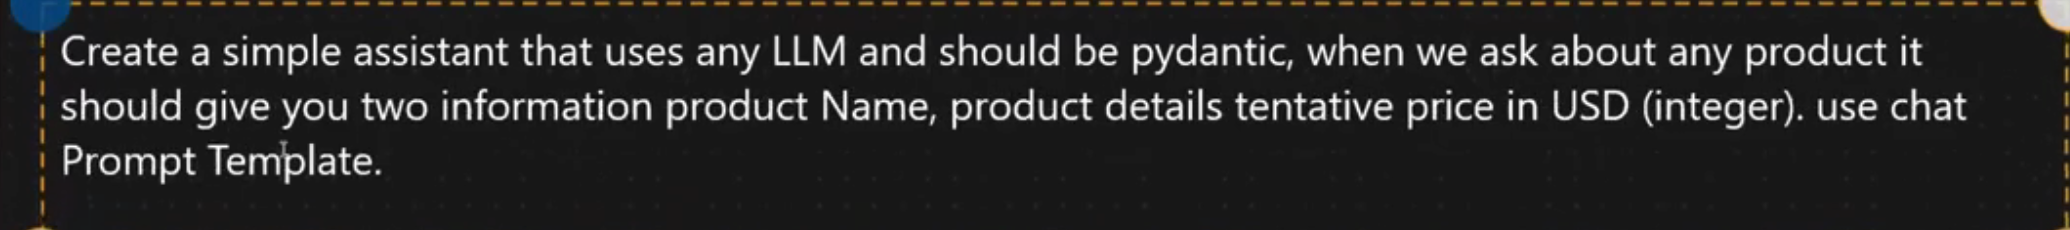

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"] = "Agentic AI Assignment"

In [11]:
# Loading necessary libraries
from pydantic import BaseModel,Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from langchain_groq import ChatGroq

class Product(BaseModel):
    product_name : str = Field(description="Name of the product")
    product_detail : str = Field(description="Details of the Product")
    tentative_price : float = Field(description="Price of the Product shoulb be in USD")

parser = PydanticOutputParser(pydantic_object=Product)
format_instructions = parser.get_format_instructions()

In [14]:
template = ChatPromptTemplate.from_messages(
    [
        ("system","You are a helpful ai assistance that extracts product information in structured JSON format "
         "compatible with the following schema: {format_instructions} and price should only be in USD"),
        ("user","{input}")
    ]
)
model = ChatGroq(model = "gemma2-9b-it")
chain = template | model | parser

input_text = "Introducing the SmartBottle X — a self-cleaning stainless steel water bottle with UV-C technology that kills 99.99% of bacteria.  Ideal for travelers and health-conscious users. Estimated price: around 79 USD."
result = chain.invoke({"input" : input_text,
                       "format_instructions" : format_instructions})
print(result)

product_name='SmartBottle X' product_detail='a self-cleaning stainless steel water bottle with UV-C technology that kills 99.99% of bacteria.  Ideal for travelers and health-conscious users.' tentative_price=79.0
